# Chapter 4: Histograms and Thresholding

## Histograms

<img src="./images/histogram.png" alt="Histogram" width="1000"/>

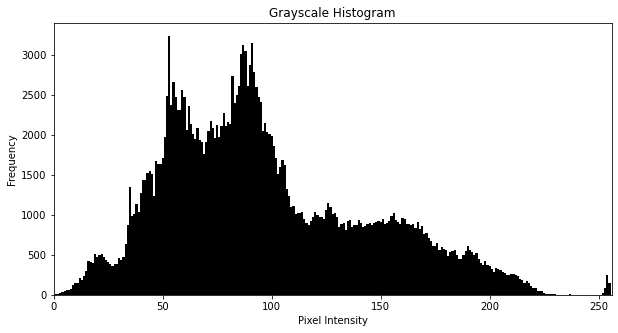

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image
image = cv2.imread('./images/einstein.jpg')

# 2. Calculate the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# 3. Create a bar plot for the histogram
plt.figure(figsize=(10, 5))
plt.bar(range(256), hist.ravel(), color='black', width=1)
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])  # Limit the x-axis to the range of pixel values
plt.show()

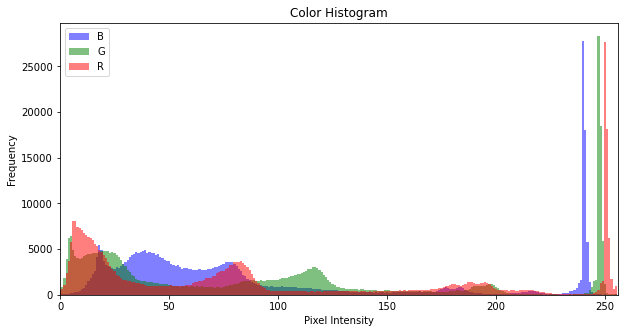

In [13]:
# 1. Load the image
image = cv2.imread('./images/obamas.jpg')

# 2. Calculate histograms for each channel
colors = ('b', 'g', 'r')  # OpenCV uses BGR order
plt.figure(figsize=(10, 5))

for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.bar(np.arange(256), hist.ravel(), color=color, width=1, alpha=0.5, label=color.upper())

plt.title('Color Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.legend()
plt.show()

<img src="./images/histogram2.png" alt="Histogram (cont)" width="1000"/>

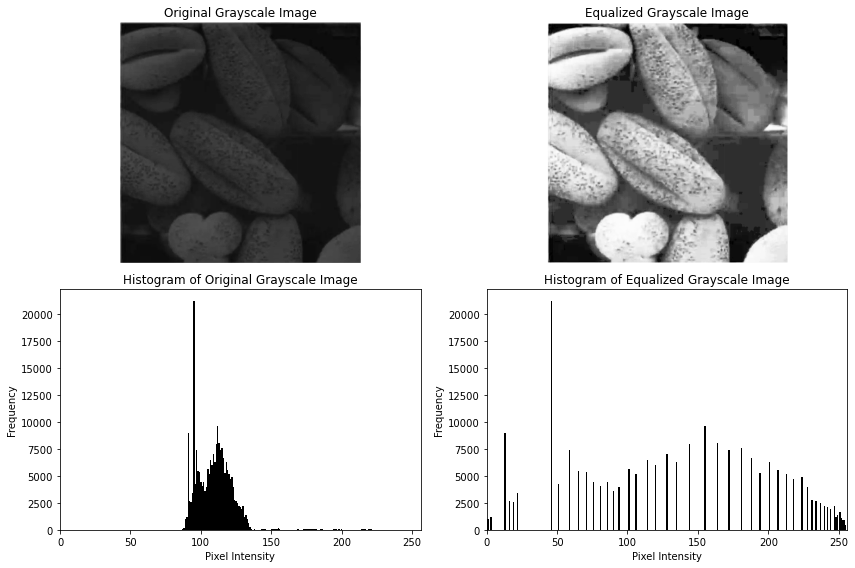

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image
gray_image = cv2.imread('./images/histogram_bad.jpg',-1)

# 2. Calculate the histogram of the original grayscale image
original_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# 3. Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# 4. Calculate the histogram of the equalized grayscale image
equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# 5. Display the original and equalized images along with their histograms
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Equalized Image
plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Grayscale Image')
plt.axis('off')

# Histogram for Original Image
plt.subplot(2, 2, 3)
# plt.plot(original_hist, color='black')
plt.bar(range(256), original_hist.ravel(), color='black', width=1)
plt.title('Histogram of Original Grayscale Image')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram for Equalized Image
plt.subplot(2, 2, 4)
# plt.plot(equalized_hist, color='black')
plt.bar(range(256), equalized_hist.ravel(), color='black', width=1)
plt.title('Histogram of Equalized Grayscale Image')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<img src="./images/gamma_correction.png" alt="gamma_correction (cont)" width="1000"/>

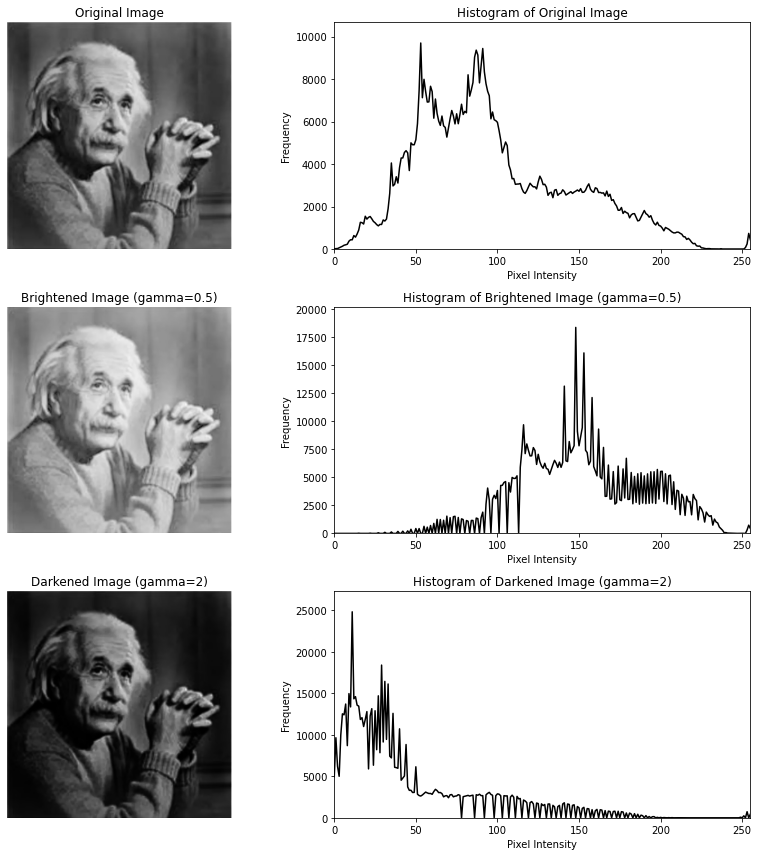

True

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma):
    # Normalize the image to the range [0, 1]
    normalized_image = image / 255.0
    
    # Apply gamma correction
    corrected_image = np.power(normalized_image, gamma)
    
    # Rescale back to [0, 255]
    corrected_image = np.uint8(corrected_image * 255)
    
    return corrected_image

def plot_histogram(image, ax, title):
    # Calculate histogram
    histogram, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    # Plot histogram
    ax.plot(bins[:-1], histogram, color='black')
    ax.set_xlim([0, 255])
    ax.set_ylim([0, np.max(histogram) * 1.1])
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

# Step 1: Load the image
original_image = cv2.imread('./images/einstein.jpg')

# Step 2: Apply gamma correction to brighten and darken the image
gamma_bright = 0.5  # Gamma value < 1 to brighten
gamma_dark = 2     # Gamma value > 1 to darken

brightened_image = gamma_correction(original_image, gamma_bright)
darkened_image = gamma_correction(original_image, gamma_dark)

# Step 3: Display the original, brightened, and darkened images along with their histograms
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Original Image
axs[0, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')
plot_histogram(original_image, axs[0, 1], 'Histogram of Original Image')

# Brightened Image
axs[1, 0].imshow(cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title(f'Brightened Image (gamma={gamma_bright})')
axs[1, 0].axis('off')
plot_histogram(brightened_image, axs[1, 1], f'Histogram of Brightened Image (gamma={gamma_bright})')

# Darkened Image
axs[2, 0].imshow(cv2.cvtColor(darkened_image, cv2.COLOR_BGR2RGB))
axs[2, 0].set_title(f'Darkened Image (gamma={gamma_dark})')
axs[2, 0].axis('off')
plot_histogram(darkened_image, axs[2, 1], f'Histogram of Darkened Image (gamma={gamma_dark})')

plt.tight_layout()
plt.show()

# Step 4: Save the images (optional)
cv2.imwrite('brightened_image.jpg', brightened_image)
cv2.imwrite('darkened_image.jpg', darkened_image)

## Thresholding

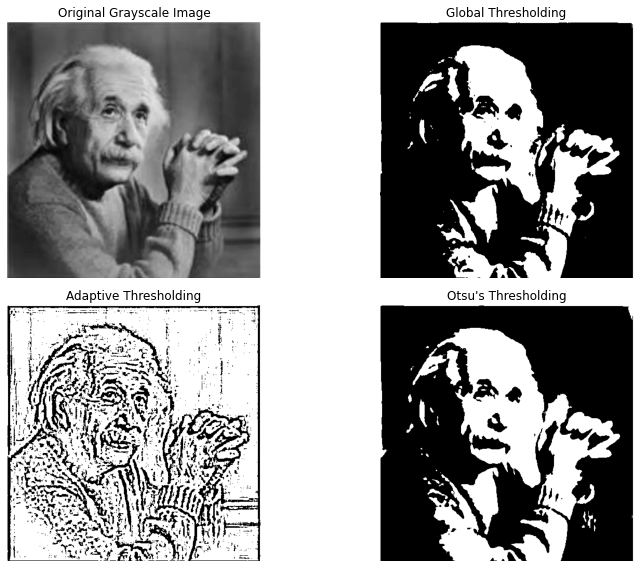

In [31]:
# Thresholding is a crucial technique in image processing used to create a binary image from a grayscale image. 
# It simplifies the image by converting it into two distinct regions based on a threshold value: 
#     - one for pixels above the threshold 
#     - one for pixels below it. 

# This technique is often used in various applications, such as image segmentation, object detection, and feature extraction.

# Types of Thresholding
#     - Global Thresholding: A single threshold value is applied to the entire image.
#     - Adaptive Thresholding: The threshold value is determined for smaller regions of the image, 
#         allowing for better handling of varying lighting conditions.
#     - Otsu’s Thresholding: A method to find an optimal threshold value by maximizing the variance between 
#         the foreground and background pixel values.

    
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
original_image = cv2.imread('./images/einstein.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Apply Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11,  # Block size
    2    # Constant subtracted from the mean
)

# Apply Otsu's Thresholding
_, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 3: Display the original and thresholded images
plt.figure(figsize=(12, 8))

# Original Grayscale Image
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Global Thresholding
plt.subplot(2, 2, 2)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')

# Adaptive Thresholding
plt.subplot(2, 2, 3)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

# Otsu's Thresholding
plt.subplot(2, 2, 4)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()